# Exploratory Data Analysis

Hello GDSC members! 😃😃

In this notebook we will perform Exploratory Data Analysis on the "Churn for Bank Customers" Dataset.

Dataset link: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

## What is Exploratory Data Analysis (EDA)?

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

(Definition source: https://www.ibm.com/cloud/learn/exploratory-data-analysis)

To put it in simpler terms, in this notebook we will:

    1 - Discover the data types in our dataset. 🔎
    2 - Get to know our data more by visualizing their distributions. 🔬
    3 - Understand the relationships between the features and the target variable. 👨‍🔬
    4 - Understand the relationships between features. 👨‍🔬👨‍🔬
    5 - Perform statistical tests to check for statistical dependence. 🧪
    6 - Gather insights and think about possible approaches for preprocessing, feature engineering and model algorithm choice. 🧐


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from IPython.display import display

import scipy

plt.style.use('Solarize_Light2')

In [2]:
data = pd.read_csv('data/churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(f'Number of samples: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of samples: 10000
Number of columns: 14


## Types of Data in Data Science
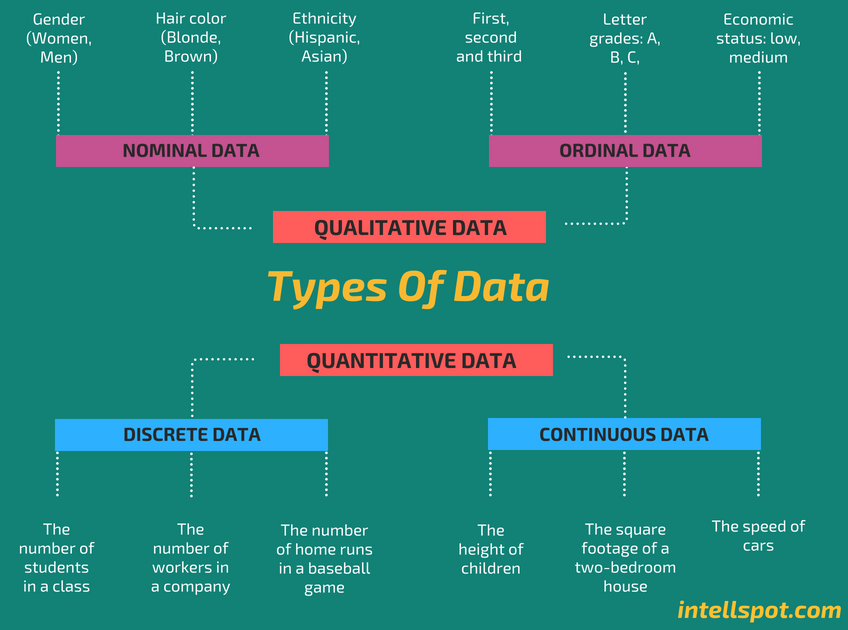

| Column | Description | Data type |
| --- | --- | --- |
| Surname | Surname | Qualitative Nominal |
| CreditScore | Credit Score | Quantitative Continuous |
| Geography | Country | Qualitative Nominal |
| Gender | Gender | Qualitative Nominal |
| Age | Age | Quantitative Discrete |
| Tenure | How many years of customer | Quantitative Discrete |
| Balance | Balance | Quantitative Continuous |
| NumOfProducts | Number of used products | Quantitative Discrete |
| HasCrCard | Credit card status (0 = No, 1 = Yes) | Qualitative Nominal |
| IsActiveMember | Active membership status (0 = No, 1 = Yes) | Qualitative Nominal |
| EstimatedSalary | Estimated salary | Quantitative Continuous |
| Exited (target) | Abandoned or not? (0 = No, 1 = Yes) | Qualitative Nominal |

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isna().mean(axis=0)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df = data.copy()      # Create a copy of our dataset
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)    # Drop the RowNumber and CustomerID columns (useless)
df.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Use pandas' groupby method to see percentages of Exited w.r.t. certain features
grouped_by_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in grouped_by_columns:
    display(df.groupby(column)[['Exited']].agg(['mean', 'count']).T)

Geography          France      Germany        Spain
Exited mean      0.161548     0.324432     0.166734
       count  5014.000000  2509.000000  2477.000000

Gender             Female         Male
Exited mean      0.250715     0.164559
       count  4543.000000  5457.000000

NumOfProducts            1            2           3     4
Exited mean       0.277144     0.075817    0.827068   1.0
       count   5084.000000  4590.000000  266.000000  60.0

HasCrCard               0            1
Exited mean      0.208149     0.201843
       count  2945.000000  7055.000000

IsActiveMember            0            1
Exited mean        0.268509     0.142691
       count    4849.000000  5151.000000

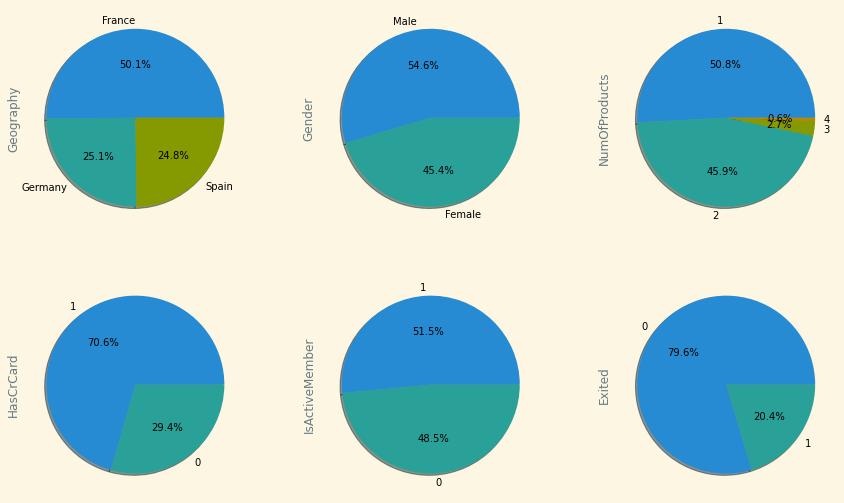

In [8]:
# Visualize distributions of columns with small number of unique values using pie charts

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for index, column in enumerate(grouped_by_columns + ['Exited']):
    i = index // 3
    j = index % 3

    df[column].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, ax=axes[i, j])
plt.show()

    - The target variable is unbalanced -> accuracy may not be a good evaluation metric later on.
    - Values 3 and 4 in NumOfProducts column represent respectively 2.7% and 0.6% of our data, may need to replace them with a single value.

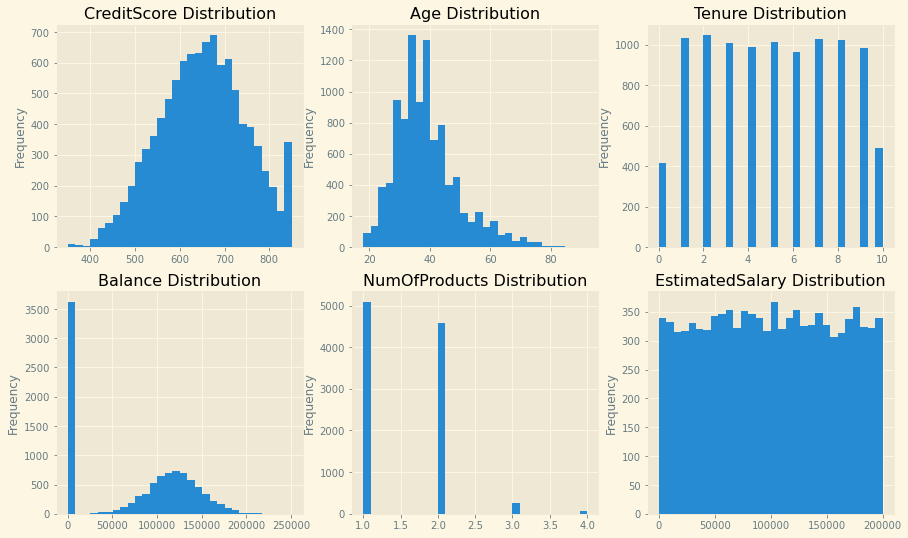

In [9]:
# Visualize distributions of numerical (quantitative) columns using histograms
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for index, column in enumerate(numerical_columns):
    i = index // 3
    j = index % 3
    df[column].plot.hist(bins=30, ax=axes[i, j])
    axes[i, j].set_title(f'{column} Distribution')
plt.show()

    - EstimatedSalary has a uniform distribution.
    - Balance has many zero values and a normal distribution with mean 120000-130000 -> splitting it into two features may be a good idea
    - CreditScore seems to be capped at 850.

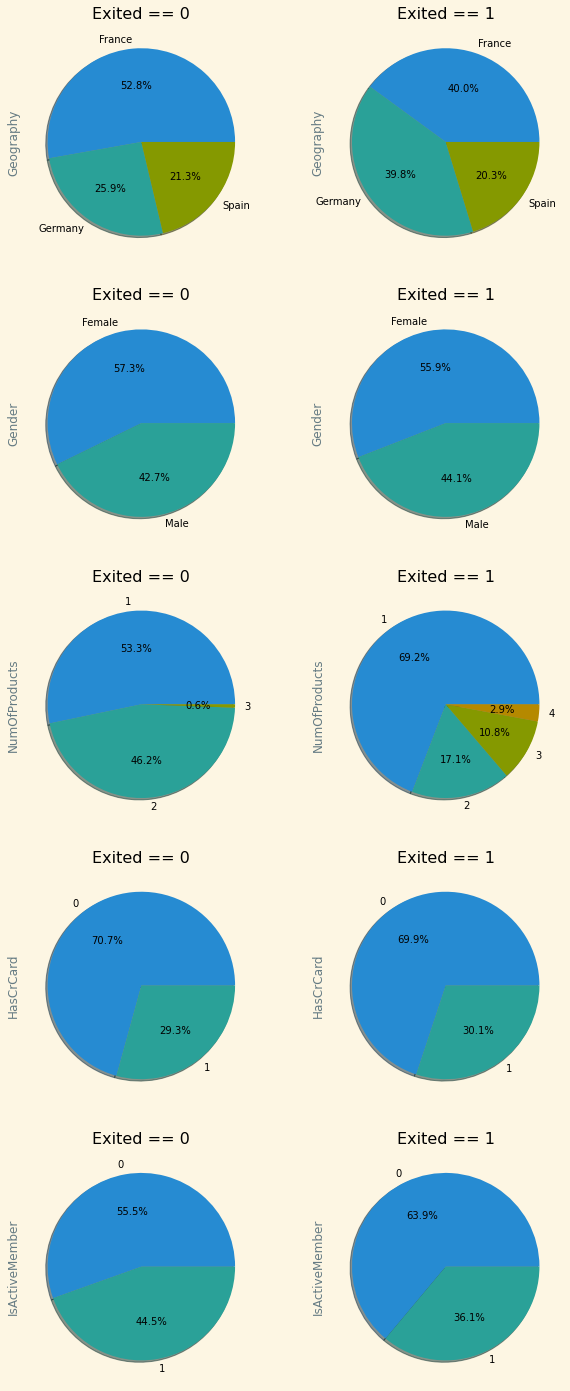

In [10]:
# Visualize distributions withing two groups (Exited == 0 and Exited == 1) using pie charts

fig, axes = plt.subplots(len(grouped_by_columns), 2, figsize=(10, 25))
for index, column in enumerate(grouped_by_columns):
    exited_0 = df[df['Exited'] == 0][column].value_counts()
    exited_1 = df[df['Exited'] == 1][column].value_counts()
    
    exited_0.plot.pie(autopct='%1.1f%%', shadow=True, ax=axes[index, 0], labels=sorted(exited_0.index))
    exited_1.plot.pie(autopct='%1.1f%%', shadow=True, ax=axes[index, 1], labels=sorted(exited_1.index))
    
    axes[index, 0].set_title('Exited == 0')
    axes[index, 1].set_title('Exited == 1')
    
    
plt.show()

    - Only 0.6% of customers in the negative group use 3 products while 10.8% of customers in the positive group use 3 products.
    - Every customer who uses 4 products has exited (2.9% of exiting customers use 4 products).

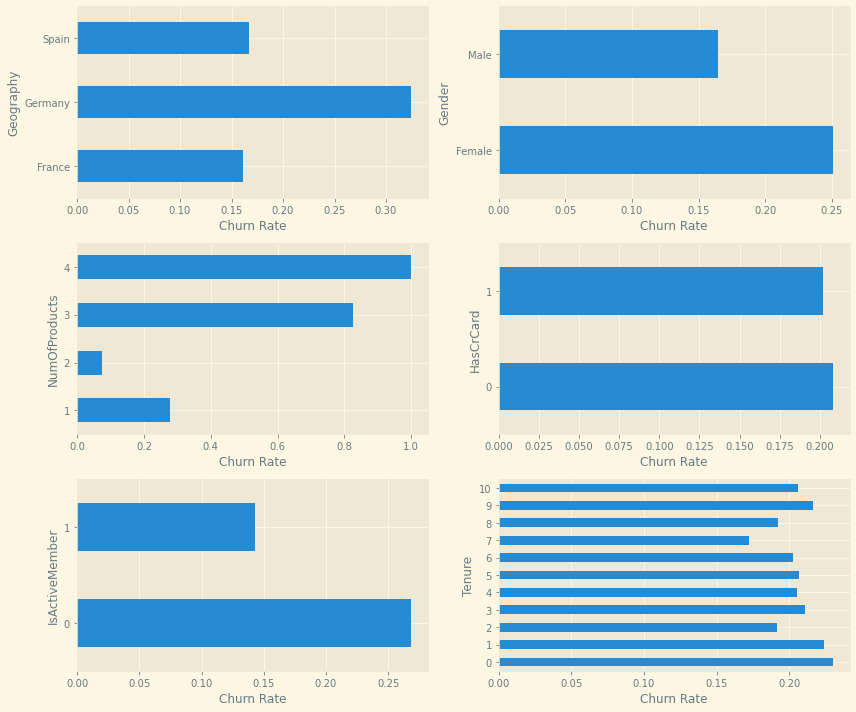

In [11]:
# Visualize the churn rate with respect to some features
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for index, column in enumerate(grouped_by_columns + ['Tenure']):
    i = index // 2
    j = index % 2
    
    gb_df = df.groupby(column)['Exited'].mean()
    gb_df.plot(kind='barh', ax=axes[i, j])
    axes[i, j].set_xlabel('Churn Rate')
plt.tight_layout()
plt.show()

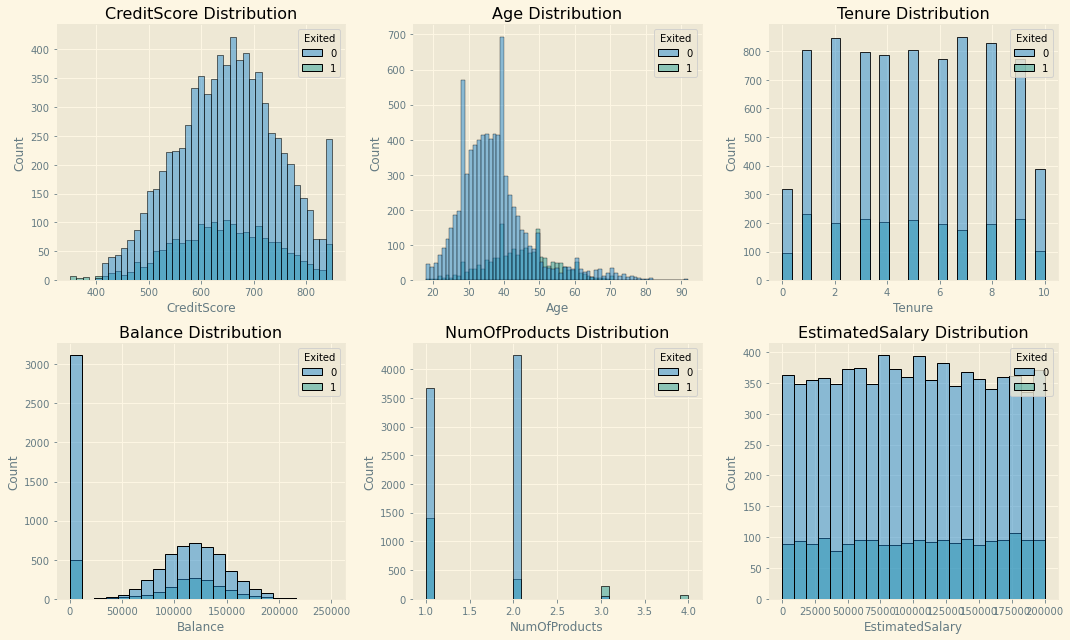

In [12]:
# Visualize the distributions of numerical features for two groups (Exited == 0 and Exited == 1).

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for index, column in enumerate(numerical_columns):
    i = index // 3
    j = index % 3
    sns.histplot(data=df, x=column, hue='Exited', ax=axes[i, j])
    axes[i, j].set_title(f'{column} Distribution')
plt.tight_layout()
plt.show()

Visually, there is difference in numerical features distribution between the two groups.

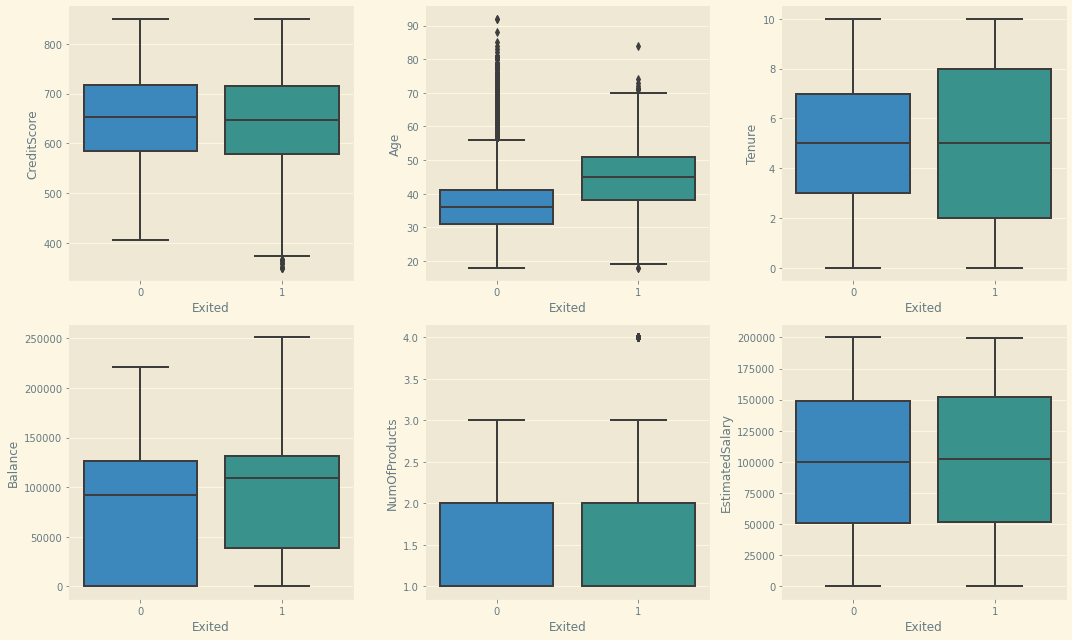

In [13]:
# Use boxplots to compare the distribution of numerical features for two groups (Exited == 0 and Exited == 1).

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for index, column in enumerate(numerical_columns):
    i = index // 3
    j = index % 3
    sns.boxplot(data=df, x='Exited', y=column, ax=axes[i, j])
plt.tight_layout()
plt.show()

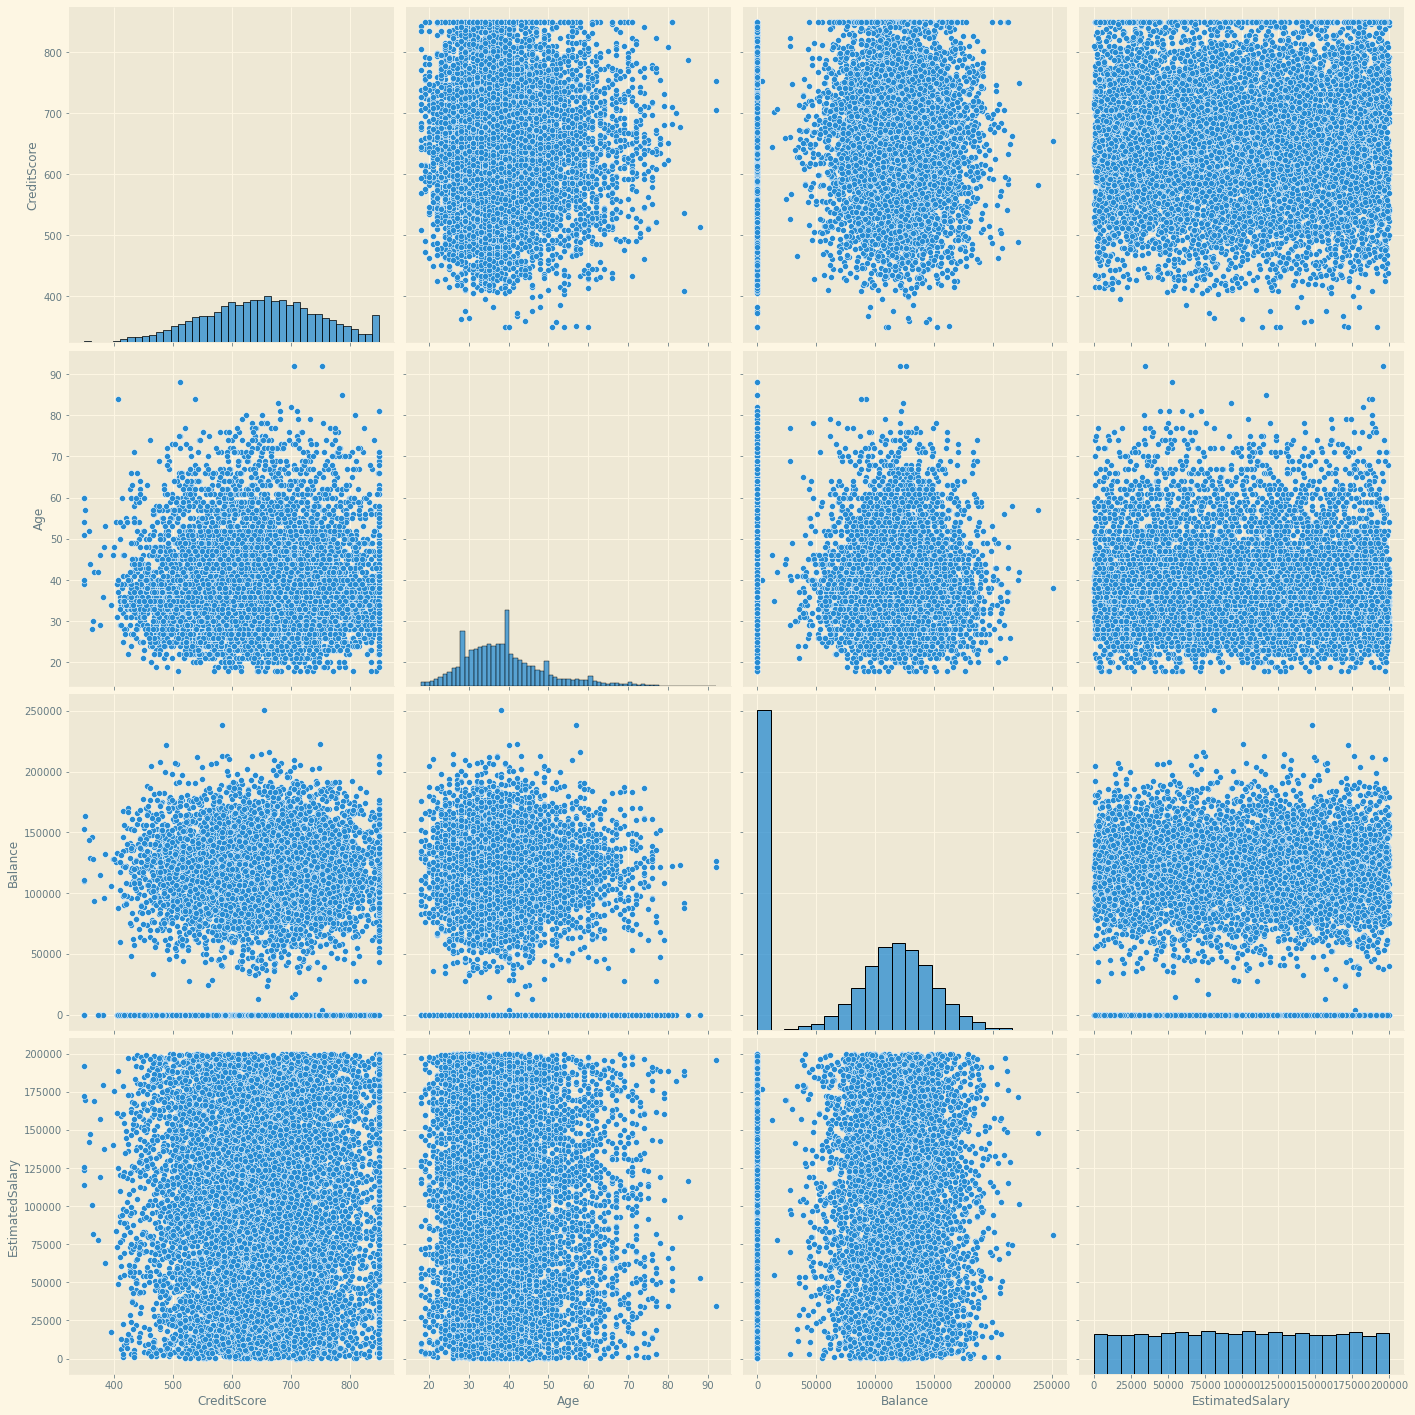

In [14]:
# Use seaborn's pairplor to visualize histograms and scatter plots of continuous variables

continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
sns.pairplot(df[continuous_columns], height=5)
plt.show()

It seems like the continuous features are independent.

Number of surnames: 2932


,Churn Rate,Count
Surname,,
Smith,0.281250,32
Martin,0.310345,29
Scott,0.103448,29
Walker,0.142857,28
Brown,0.192308,26
Shih,0.280000,25
Genovese,0.160000,25
Yeh,0.120000,25
Wright,0.250000,24


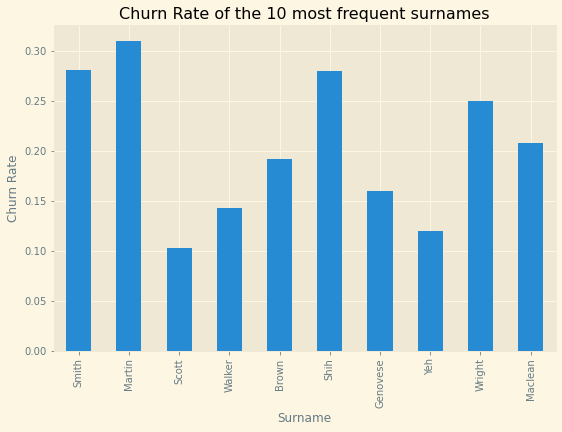

In [15]:
top_10_surnames = df.groupby('Surname')['Exited'].agg(['mean', 'count'])
top_10_surnames.columns = ['Churn Rate', 'Count']
top_10_surnames = top_10_surnames.sort_values(by='Count', ascending=False).iloc[:10, :]
print(f'Number of surnames: {df["Surname"].nunique()}')

display(top_10_surnames)
plt.figure(figsize=(9, 6))
plt.title('Churn Rate of the 10 most frequent surnames')
top_10_surnames['Churn Rate'].plot.bar()
plt.ylabel('Churn Rate')
plt.show()

Does this mean that Surname is an important feature? Maybe the variation of Churn Rate in this case is only the result of Geography or just simply chance.

In [16]:
df[df['Surname'] == 'Scott'].groupby('Geography')['Exited'].agg(['mean', 'count'])

,mean,count
Geography,,
France,0.181818,11
Germany,0.000000,8
Spain,0.100000,10


## What is Statistical Dependence?
Statistical dependence is a condition in which two random variables are not independent.

In [17]:
mask = np.any([df['Surname'] == surname for surname in top_10_surnames.index], axis=0).reshape((-1, 1))

temp_df = df[mask]
chi_square_args = pd.crosstab(temp_df['Surname'], temp_df['Exited']).values
_, p_value, _, _ = scipy.stats.chi2_contingency(chi_square_args)
p_value

0.5150020564698321

p_value = 0.52 -> the result of the test is not statistically significant.

## Quantitative / Quantitative:
Correlation is defined as the association between two random variables. In statistics it normally refers to the degree a pair of variables are linearly related.

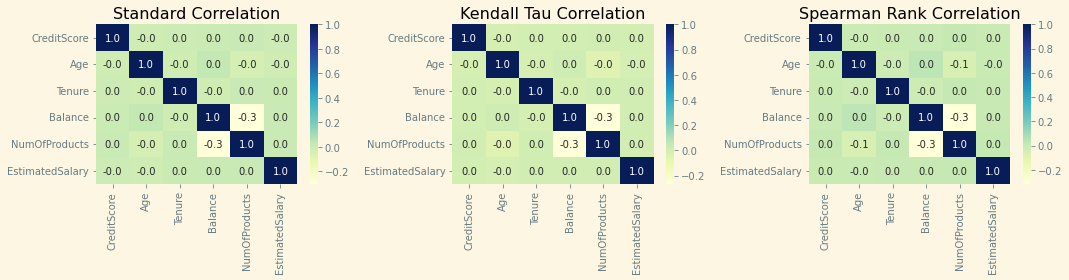

In [18]:
numerical_df = df[numerical_columns]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].set_title('Standard Correlation')
sns.heatmap(numerical_df.corr(method='pearson'), cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[0])

axes[1].set_title('Kendall Tau Correlation')
sns.heatmap(numerical_df.corr(method='kendall'), cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[1])

axes[2].set_title('Spearman Rank Correlation')
sns.heatmap(numerical_df.corr(method='spearman'), cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[2])

plt.tight_layout()
plt.show()

There is some negative correlation between Balance and NumOfProducts.

## Quantitative / Qualitative

### T-test:
A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.
The t test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The t test assumes your data:

    1 - are independent
    2 - are (approximately) normally distributed
    3 - have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

T-test to compare the means of the two groups: positive and negative samples

CreditScore     p-value = 0.0067
Age             p-value = 0.0000
Balance         p-value = 0.0000


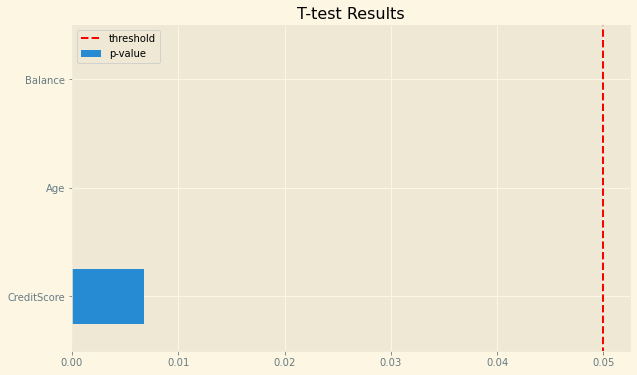

In [19]:
negative_df = df[df['Exited'] == 0]
positive_df = df[df['Exited'] == 1]

t_test_dict = {}

print('T-test to compare the means of the two groups: positive and negative samples\n')
normal_numerical_columns = ['CreditScore', 'Age', 'Balance']
for column in normal_numerical_columns:
    temp0 = negative_df[column]
    temp1 = positive_df[column]

    _, p_value = scipy.stats.ttest_ind(temp0, temp1)
    t_test_dict[column] = [p_value]
    print(f'{column:15} p-value = {p_value:.4f}')
t_test_df = pd.DataFrame.from_dict(t_test_dict, orient='index', columns=['p-value'])


t_test_df.plot(kind='barh', figsize=(10, 6))
plt.title('T-test Results')
plt.plot([0.05, 0.05], [-1, 6], c='r', linestyle='dashed', label='threshold')
plt.legend()
plt.show()

    - The null hypothesis (H0) is that the true difference between these group means is zero.
    - The alternate hypothesis (Ha) is that the true difference is different from zero.
    
The p-values of Balance, Age and CreditScore are smaller than our threshold (0.05), so we have evidence
against the null hypothesis of equal population means.

### Mann-Whitney U test:

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

    1 - The dependent variable should be measured on an ordinal scale or a continuous scale.
    2 - The independent variable should be two independent, categorical groups.
    3 - Observations should be independent. In other words, there should be no relationship between the two groups or within each group.
    4 - Observations are not normally distributed. However, they should follow the same shape (i.e. both are bell-shaped and skewed left).

Mann-Whitney U test to compare the means of the two groups: positive and negative samples

CreditScore     p-value = 0.0199
Age             p-value = 0.0000
Tenure          p-value = 0.1622
Balance         p-value = 0.0000
NumOfProducts   p-value = 0.0000
EstimatedSalary p-value = 0.2271


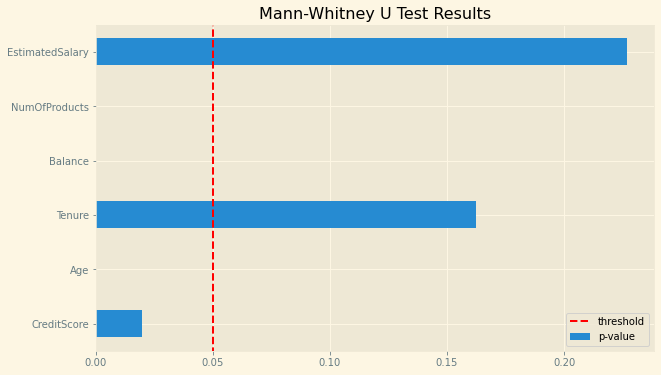

In [20]:
mwu_dict = {}

print('Mann-Whitney U test to compare the means of the two groups: positive and negative samples\n')
for column in numerical_columns:
    temp0 = negative_df[column]
    temp1 = positive_df[column]

    _, p_value = scipy.stats.mannwhitneyu(temp0, temp1)
    mwu_dict[column] = [p_value]
    print(f'{column:15} p-value = {p_value:.4f}')
mwu_df = pd.DataFrame.from_dict(mwu_dict, orient='index', columns=['p-value'])


mwu_df.plot(kind='barh', figsize=(10, 6))
plt.title('Mann-Whitney U Test Results')
plt.plot([0.05, 0.05], [-1, 6], c='r', linestyle='dashed', label='threshold')
plt.legend()
plt.show()

The p-values of Balance, Age, CreditScore and NumOfProducts are smaller than our threshold (0.05), so we have evidence
against the null hypothesis of equal population means.

## Qualitative / Qualitative
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test used in the analysis of contingency tables when the sample sizes are large. In simpler terms, this test is primarily used to examine whether two categorical variables (two dimensions of the contingency table) are independent in influencing the test statistic (values within the table).

You should use a chi-sqaure test when

    1 - Both variables are qualitative
    2 - All observations are independent
    3 - We observe at least a frequency of 5 in each group created when data is grouped by the individual pairs of categorical values.

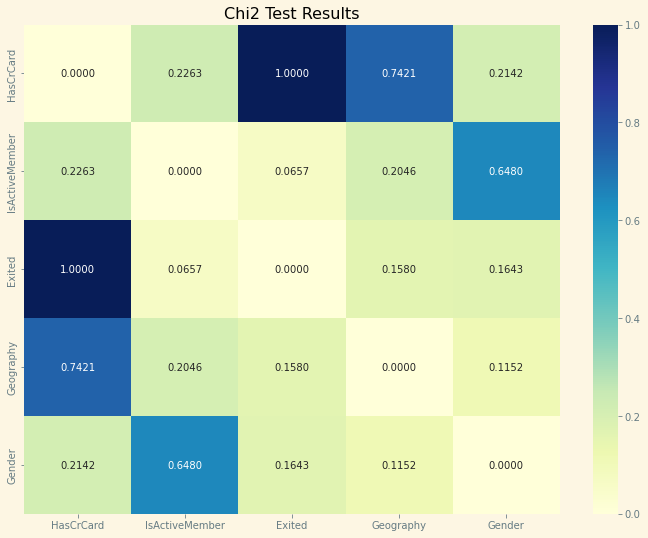

In [21]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
chi2_df = df[categorical_columns].corr()

for column1 in categorical_columns:
    for column2 in categorical_columns:
        chi_square_args = pd.crosstab(temp_df[column1], temp_df[column2]).values
        _, p_value, _, _ = scipy.stats.chi2_contingency(chi_square_args)
        chi2_df.loc[column1, column2] = p_value
    

plt.figure(figsize=(12, 9))
plt.title('Chi2 Test Results')
sns.heatmap(chi2_df, cmap='YlGnBu', annot=True, fmt='.4f')
plt.show()

We have no statistically significant result (all p-values are greater than the threshold 0.05)